In [1]:
%matplotlib inline  

print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import numpy as np
from __future__ import division
import scipy

Automatically created module for IPython interactive environment


# 11A) PCA Projection With Iris Data Set
Use PCA projection to do 2-d visualization of the entire data set.  You should plot different classes using different colors/shapes. Do the classes seem well-seperated from each other?

In [2]:
data= pd.read_csv('irisdata.data', sep=',', header=None, names=['sepal length','sepal width','petal length','petal width','class'])
X= data.ix[:,0:3].values

In [3]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
print X

[[-2.49120628 -0.32842889]
 [-2.52490896  0.17066072]
 [-2.71231754  0.1299729 ]
 [-2.55917263  0.30820093]
 [-2.53908694 -0.33875833]
 [-2.13468115 -0.75710223]
 [-2.67741646  0.06542263]
 [-2.42970863 -0.17022981]
 [-2.71111913  0.56451225]
 [-2.44212721  0.11643989]
 [-2.30024464 -0.64866055]
 [-2.41609165 -0.02236017]
 [-2.5639241   0.23458107]
 [-3.03394159  0.49409597]
 [-2.44572244 -1.18717814]
 [-2.24525786 -1.36017008]
 [-2.50127021 -0.83721802]
 [-2.49120628 -0.32842889]
 [-2.00877021 -0.87461349]
 [-2.42615558 -0.53114929]
 [-2.09035355 -0.38585331]
 [-2.41729006 -0.45689951]
 [-3.06173656 -0.16319272]
 [-2.19853344 -0.11984248]
 [-2.14114985  0.03772667]
 [-2.30259929  0.14679827]
 [-2.33806137 -0.15020086]
 [-2.36054388 -0.37232029]
 [-2.44332562 -0.31809946]
 [-2.43737574  0.19005975]
 [-2.38949509  0.20038918]
 [-2.27364808 -0.4259112 ]
 [-2.413737   -0.81781899]
 [-2.39720437 -1.10385877]
 [-2.44212721  0.11643989]
 [-2.68691939 -0.08181709]
 [-2.42679299 -0.60413923]
 

In [4]:
data['Dim1']=X[:,0]
data['Dim2']=X[:,1]
data.head()

,sepal length,sepal width,petal length,petal width,class,Dim1,Dim2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.491206,-0.328429
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.524909,0.170661
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.712318,0.129973
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.559173,0.308201
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.539087,-0.338758


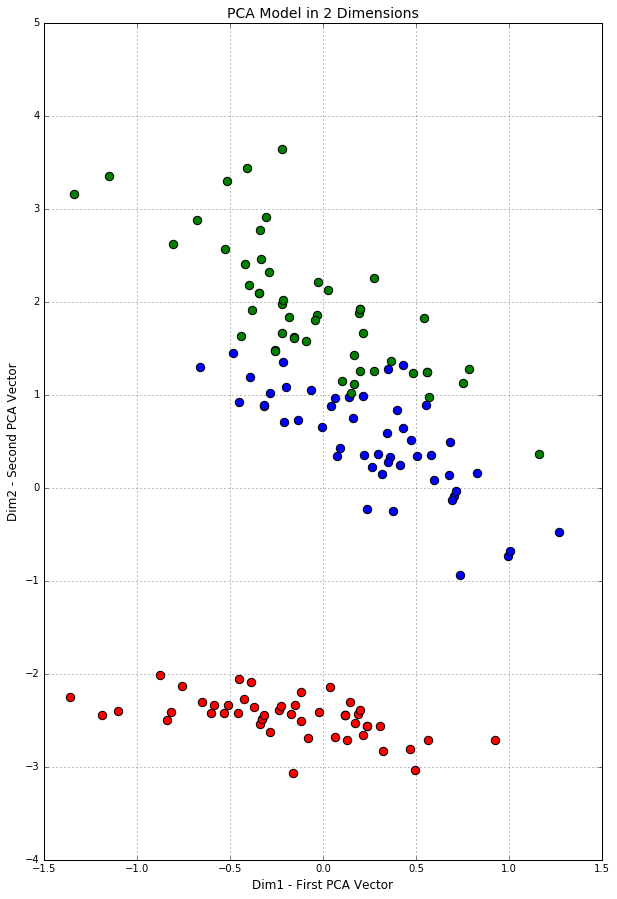

In [5]:
plt.figure(figsize=(10,15))
plt.xlabel('Dim1 - First PCA Vector', fontsize = 12)
plt.ylabel('Dim2 - Second PCA Vector', fontsize = 12)
plt.title('PCA Model in 2 Dimensions', fontsize = 14)
plt.grid()
classes = data['class'].unique()
color=['r','b','g']

for cl, co in zip(classes,color):
    Dim1 = data[data['class']==cl]['Dim1'].values
    Dim2 = data[data['class']==cl]['Dim2'].values
    plt.scatter(Dim2,Dim1, c=co, s=70)


# 11b) Build a Classifier for Training and Test Data
-Split the data set into training/test data as follows: use the first 35 points in each class for training, and use the remaining 15 points for testing. 
-What error rate do you get? 

In [6]:
data

,sepal length,sepal width,petal length,petal width,class,Dim1,Dim2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.491206,-0.328429
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.524909,0.170661
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.712318,0.129973
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.559173,0.308201
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.539087,-0.338758
5,5.4,3.9,1.7,0.4,Iris-setosa,-2.134681,-0.757102
6,4.6,3.4,1.4,0.3,Iris-setosa,-2.677416,0.065423
7,5.0,3.4,1.5,0.2,Iris-setosa,-2.429709,-0.170230
8,4.4,2.9,1.4,0.2,Iris-setosa,-2.711119,0.564512
9,4.9,3.1,1.5,0.1,Iris-setosa,-2.442127,0.116440


In [7]:
#Split first 35 of each class for training set

train_set=(data[data['class']==classes[0]][:35])
i=1
while i < 3:
    train_set=train_set.append(data[data['class']==classes[i]][:35])
    i=i+1
train_set.head()

,sepal length,sepal width,petal length,petal width,class,Dim1,Dim2
0,5.1,3.5,1.4,0.2,Iris-setosa,-2.491206,-0.328429
1,4.9,3.0,1.4,0.2,Iris-setosa,-2.524909,0.170661
2,4.7,3.2,1.3,0.2,Iris-setosa,-2.712318,0.129973
3,4.6,3.1,1.5,0.2,Iris-setosa,-2.559173,0.308201
4,5.0,3.6,1.4,0.2,Iris-setosa,-2.539087,-0.338758


In [8]:
#Split last 15 of each class for testing or validiation set

data_test=(data[data['class']==classes[0]][35:])
i=1
while i < 3:
    data_test=data_test.append(data[data['class']==classes[i]][35:])
    i=i+1
data_test.head()

,sepal length,sepal width,petal length,petal width,class,Dim1,Dim2
35,5.0,3.2,1.2,0.2,Iris-setosa,-2.686919,-0.081817
36,5.5,3.5,1.3,0.2,Iris-setosa,-2.426793,-0.604139
37,4.9,3.1,1.5,0.1,Iris-setosa,-2.442127,0.116440
38,4.4,3.0,1.3,0.2,Iris-setosa,-2.811632,0.470234
39,5.1,3.4,1.5,0.2,Iris-setosa,-2.390693,-0.234150


In [9]:
classes


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Built Classifier Using Gaussian Generative Model

In [10]:
def Gaussian_gen_classifier(sample_d, valid_d, smoothing_c):
    prob = []
    for label in range(3): 
        cond = sample_d['class']==classes[label] 
        mean = np.mean(sample_d[cond].ix[:,0:4].values, axis = 0)
        cov = np.cov(np.transpose(sample_d[cond].ix[:,0:4].values)) + (smoothing_c*np.identity(4))
        func = scipy.stats.multivariate_normal(mean=mean, cov=cov)
        prob.append(func.logpdf(valid_d.ix[:,0:4]))     
    max_prob = np.argmax(prob, axis = 0)
    error = np.sum([classes[i]!=j for i,j in zip(max_prob, valid_d['class'])])/len(valid_d)
    return error

In [11]:
cond= train_set['class']==classes[0]
np.mean(train_set[cond].ix[:,0:4].values, axis=0)

array([ 5.04571429,  3.46857143,  1.47714286,  0.24      ])

# Calculate Error

In [13]:
error = Gaussian_gen_classifier(train_set, data_test, 0)
print('Error:\t',error)

('Error:\t', 0.0)
